In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import stats
from warnings import filterwarnings
filterwarnings("ignore")

In [382]:
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [383]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [384]:
df=df.drop('Transaction date',axis=1)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [386]:
data=df.describe()
round(data,2).T

,count,mean,std,min,25%,50%,75%,max
House Age,414.0,17.71,11.39,0.00,9.02,16.10,28.15,43.80
Distance from nearest Metro station (km),414.0,1083.89,1262.11,23.38,289.32,492.23,1454.28,6488.02
Number of convenience stores,414.0,4.09,2.95,0.00,1.00,4.00,6.00,10.00
latitude,414.0,24.97,0.01,24.93,24.96,24.97,24.98,25.01
longitude,414.0,121.53,0.02,121.47,121.53,121.54,121.54,121.57
Number of bedrooms,414.0,1.99,0.82,1.00,1.00,2.00,3.00,3.00
House size (sqft),414.0,931.48,348.91,402.00,548.00,975.00,1234.75,1500.00
House price of unit area,414.0,37.98,13.61,7.60,27.70,38.45,46.60,117.50


In [387]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))
print('\n')

The dataset has 414 rows and 8 columns.




In [388]:
df.duplicated().sum()

0

In [389]:
df_cat=df[['Number of bedrooms','Number of convenience stores']].astype(str)

In [390]:
df.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [391]:
df_num=df[['House Age',
       'Distance from nearest Metro station (km)',
       'latitude', 'longitude',
       'House size (sqft)', 'House price of unit area']]

In [392]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Number of bedrooms            414 non-null    object
 1   Number of convenience stores  414 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


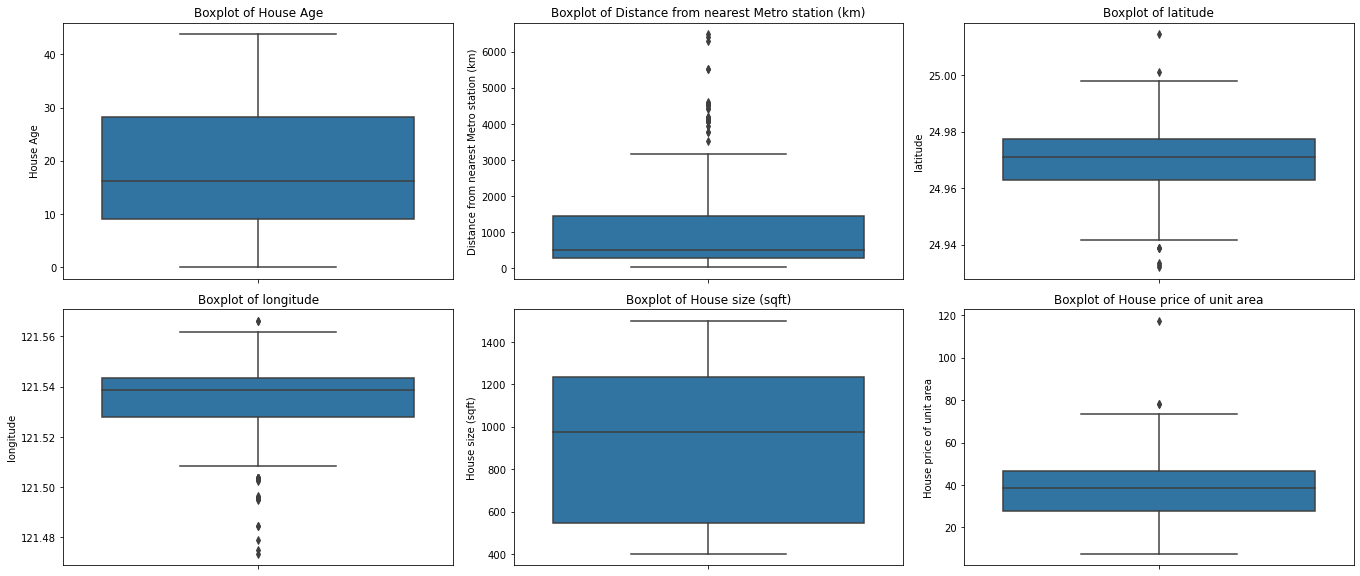

In [394]:
#Check for presence of outliers in each feature - Univaraiant Analysis
plt.figure(figsize = (19,20))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [395]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
outlier=((df_num < (Q1 - 1.5 * IQR)) | (df_num> (Q3 + 1.5 * IQR))).sum()

In [396]:
outlier1=pd.DataFrame((round(outlier,2)), columns = ["outlier"] ).sort_values('outlier',ascending=False)
outlier1

,outlier
Distance from nearest Metro station (km),37
longitude,35
latitude,8
House price of unit area,3
House Age,0
House size (sqft),0


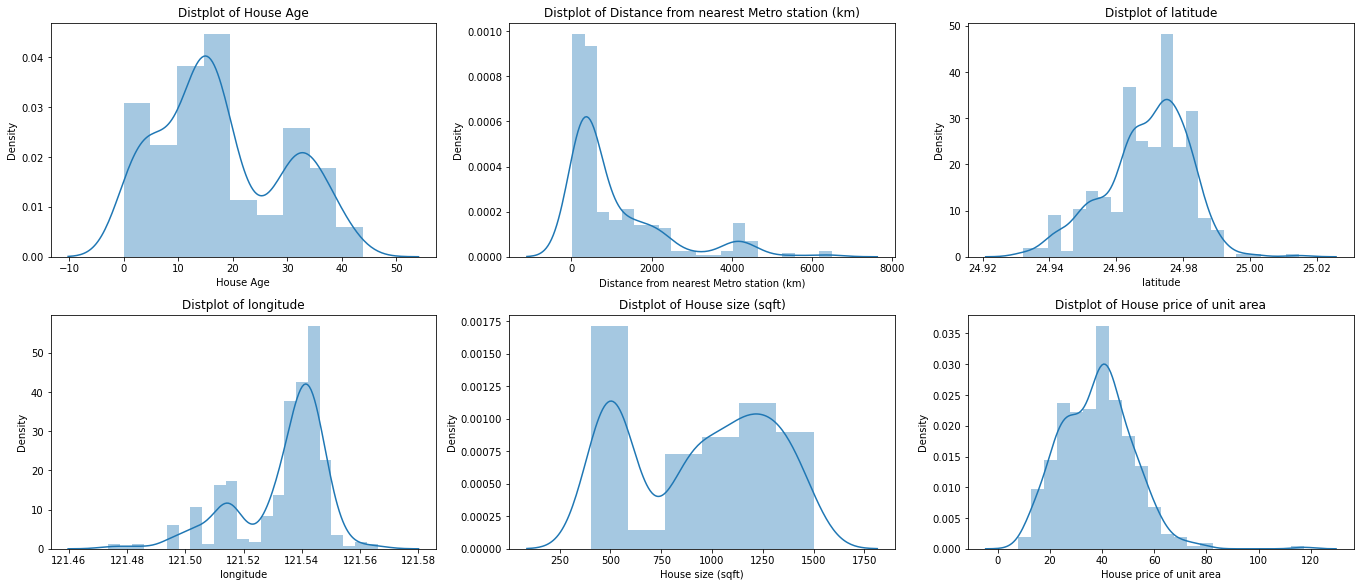

In [397]:
#Check for the distribution in each feature using distplot-Univaraiant Analysis
plt.figure(figsize = (19,20))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.distplot(df_num[df_num.columns[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [398]:
Skewness=pd.DataFrame((round(df_num.skew(),2)), columns = ["Skewness"] ).sort_values('Skewness',ascending=False)
Skewness

,Skewness
Distance from nearest Metro station (km),1.89
House price of unit area,0.60
House Age,0.38
House size (sqft),-0.11
latitude,-0.44
longitude,-1.22


In [399]:
kurtosis1=pd.DataFrame((round(df_num.kurtosis(),2)), columns = ["kurtosis"] ).sort_values('kurtosis',ascending=False)
kurtosis1

,kurtosis
Distance from nearest Metro station (km),3.21
House price of unit area,2.18
longitude,1.20
latitude,0.27
House Age,-0.88
House size (sqft),-1.42


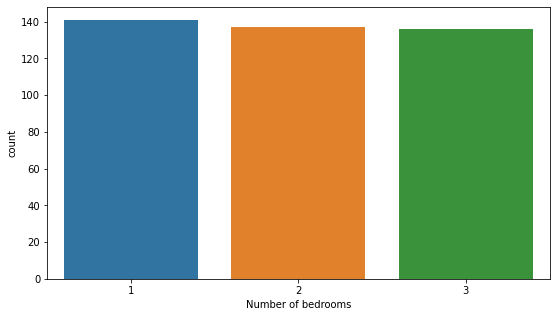

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [400]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Number of bedrooms')
plt.show()
df['Number of bedrooms'].value_counts()

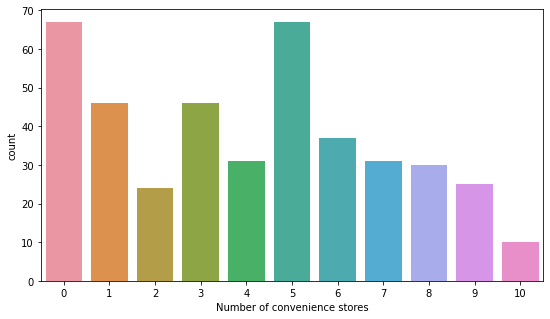

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

In [401]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Number of convenience stores')
plt.show()
df['Number of convenience stores'].value_counts()

In [402]:
feature_list=df[['House Age',
       'Distance from nearest Metro station (km)',
       'latitude', 'longitude',
       'House size (sqft)']].columns

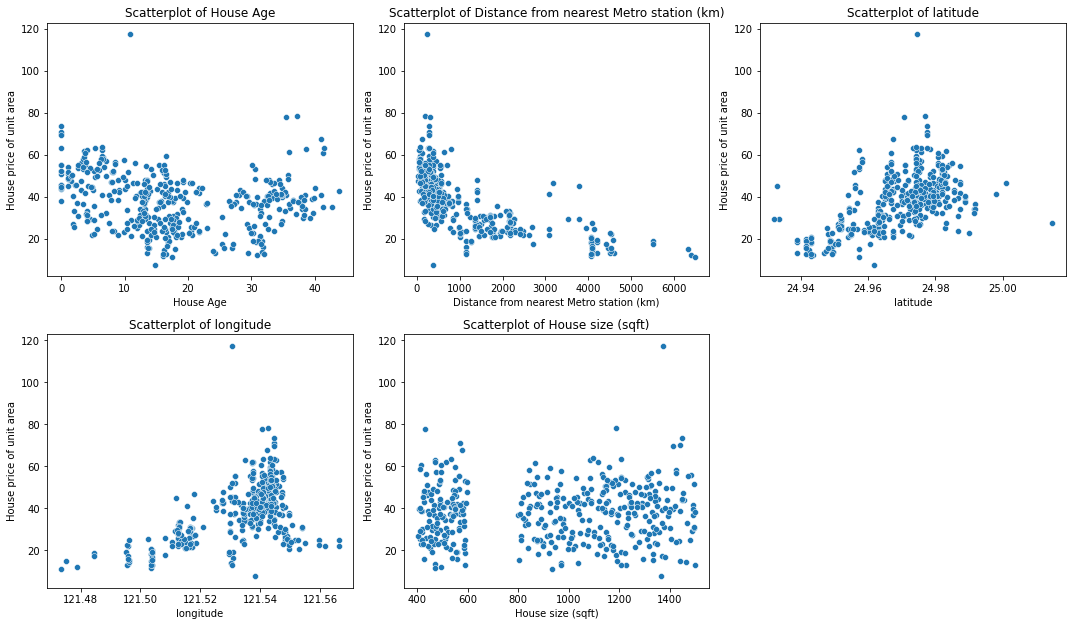

In [403]:
plt.figure(figsize=(15,30))
for i in range(len(feature_list)):
    plt.subplot(7,3,i+1)
    sns.scatterplot(y='House price of unit area',x=feature_list[i],data=df)
    plt.title('Scatterplot of {}'.format(feature_list[i]))
    plt.tight_layout()

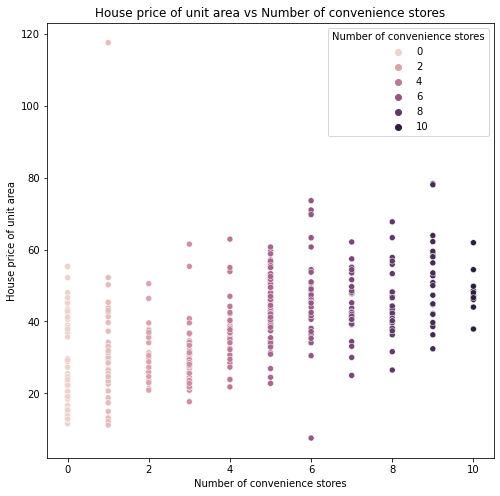

In [404]:
plt.figure(figsize=(8,8))
sns.scatterplot(y=df['House price of unit area'],x=df['Number of convenience stores'],hue=df['Number of convenience stores']);
plt.title('House price of unit area vs Number of convenience stores')
plt.show()

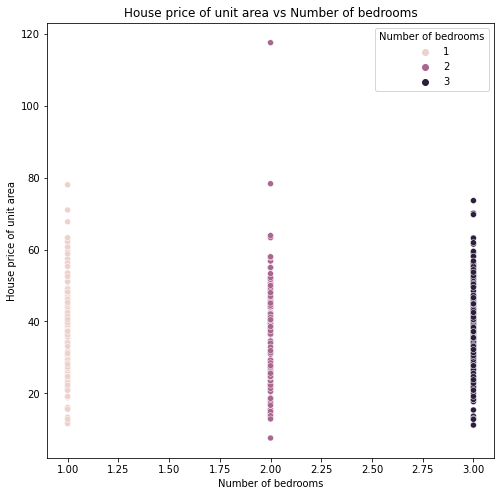

In [405]:
plt.figure(figsize=(8,8))
sns.scatterplot(y=df['House price of unit area'],x=df['Number of bedrooms'],hue=df['Number of bedrooms']);
plt.title('House price of unit area vs Number of bedrooms')
plt.show()

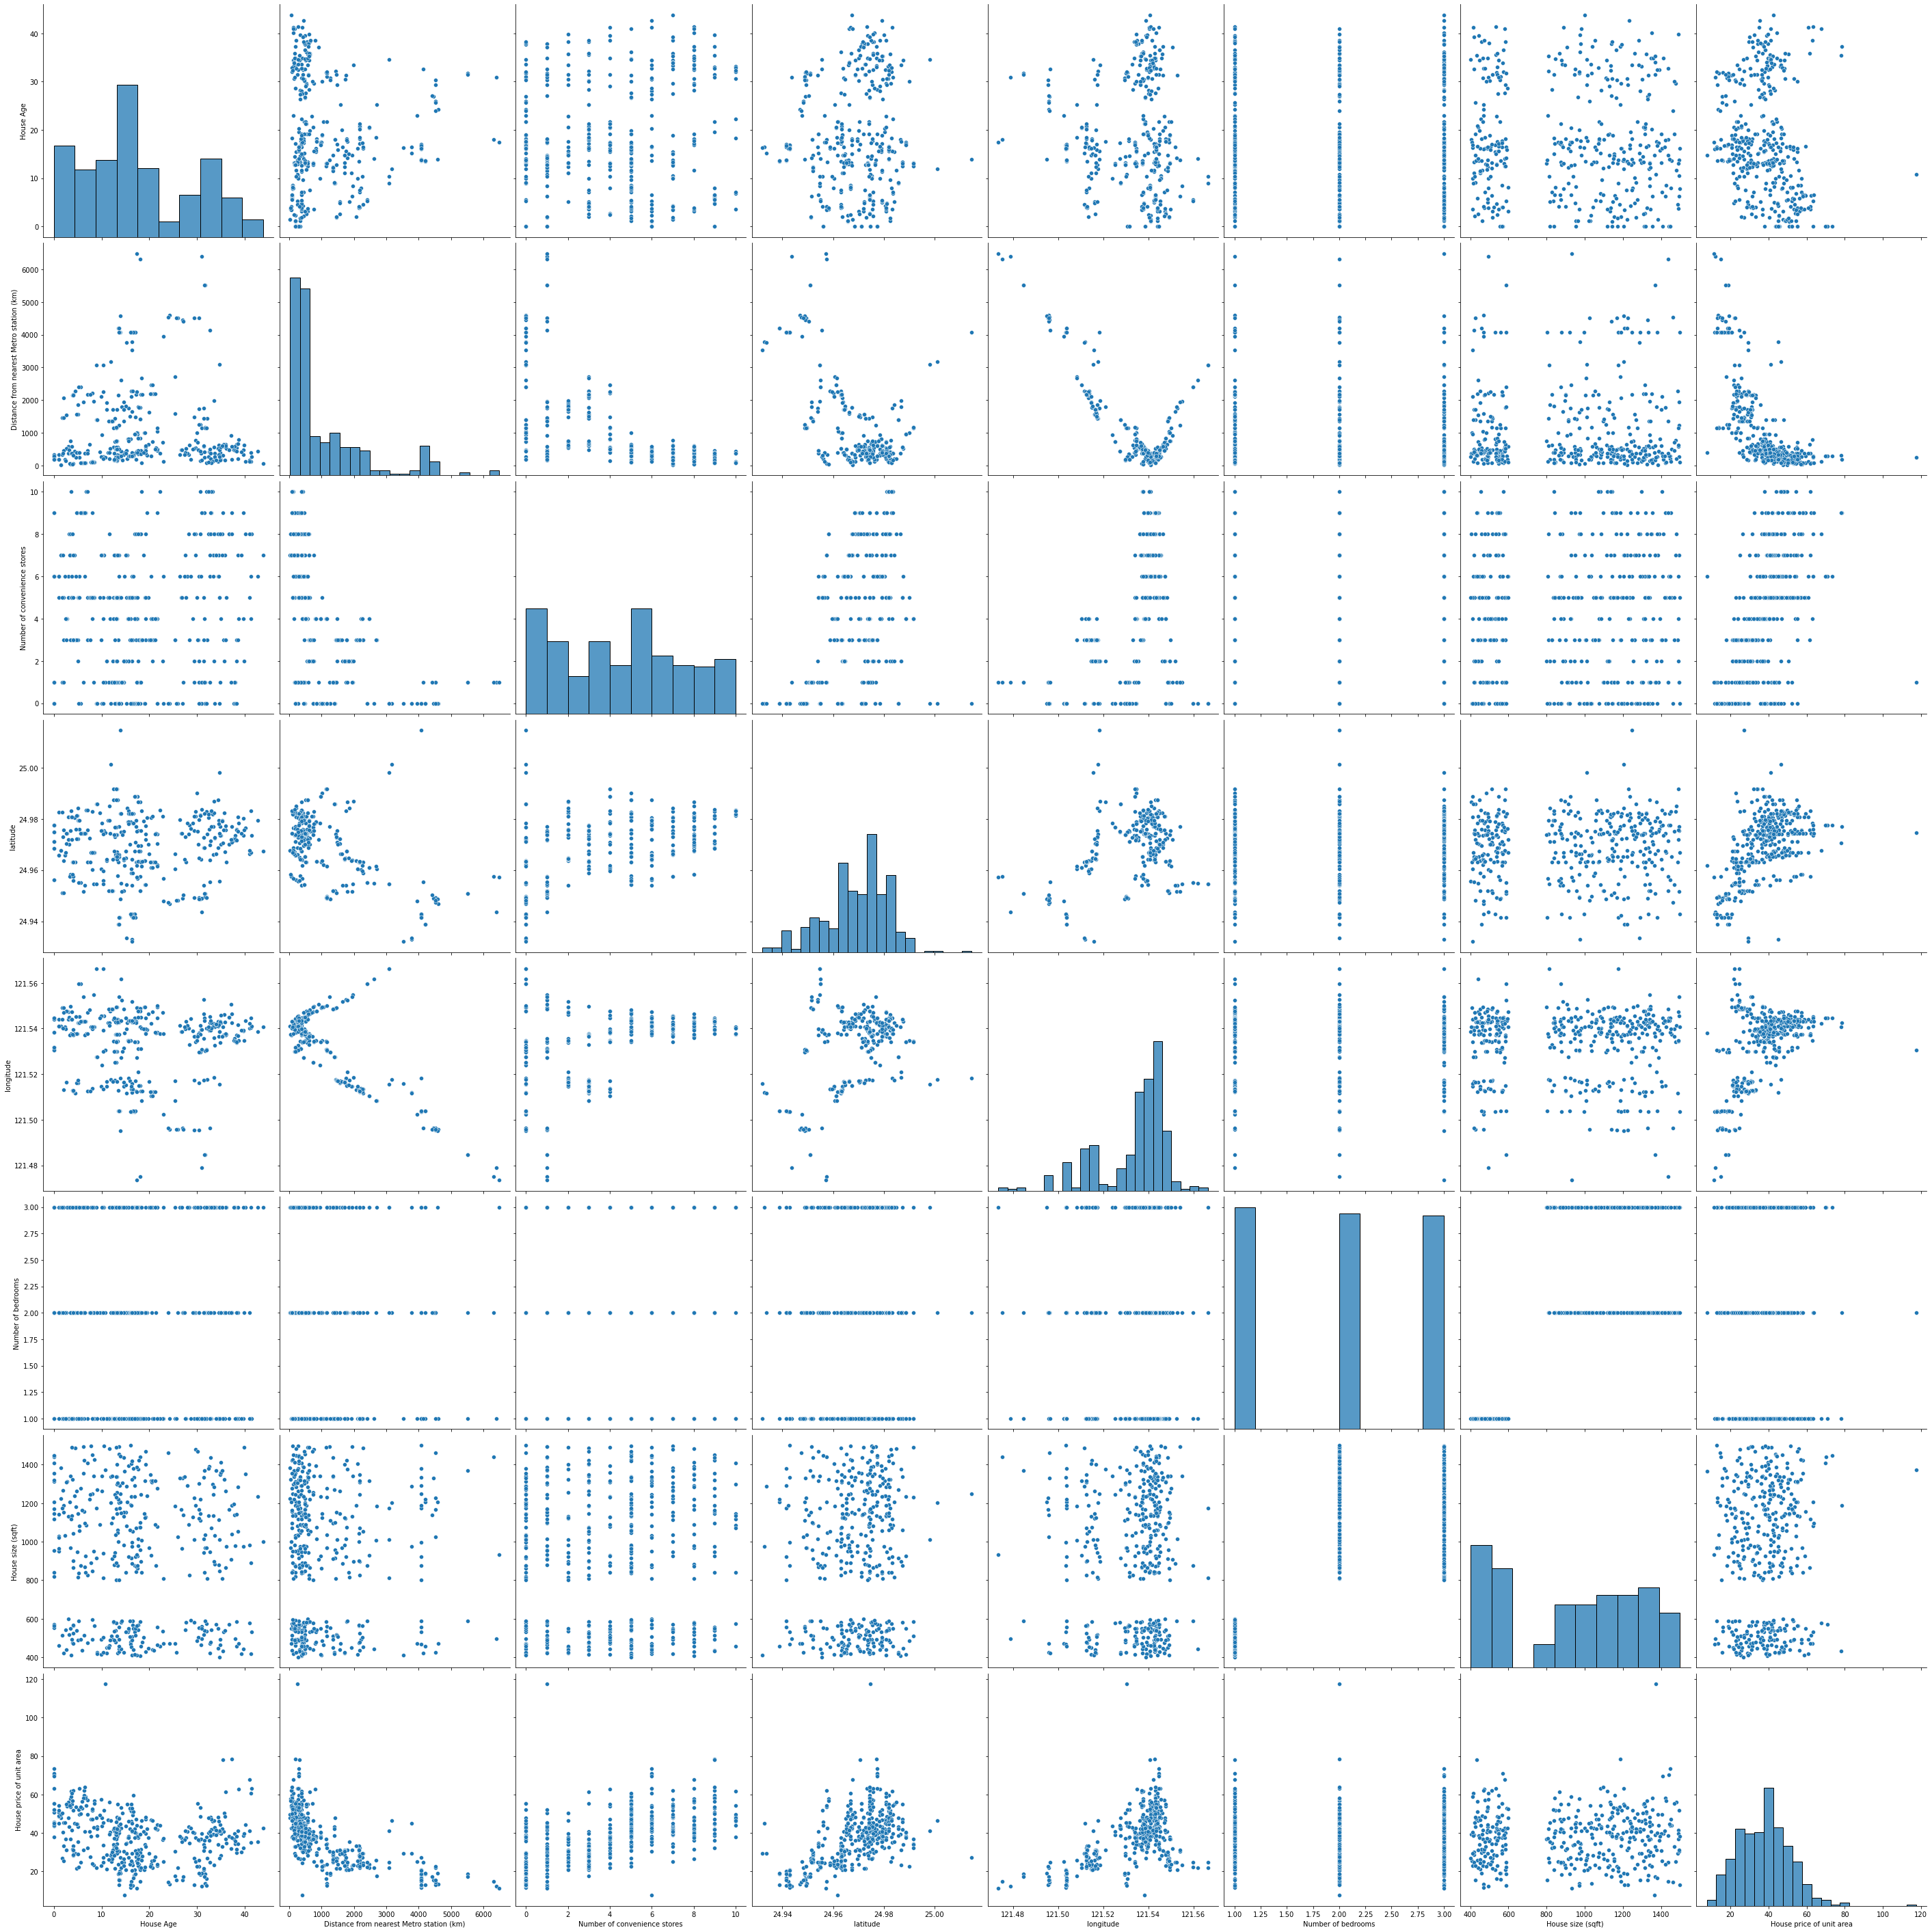

In [406]:
sns.pairplot(df,size=5)

In [407]:
feature_list_corr=df[['House Age',
       'Distance from nearest Metro station (km)',
       'latitude', 'longitude',
       'House size (sqft)','House price of unit area']]

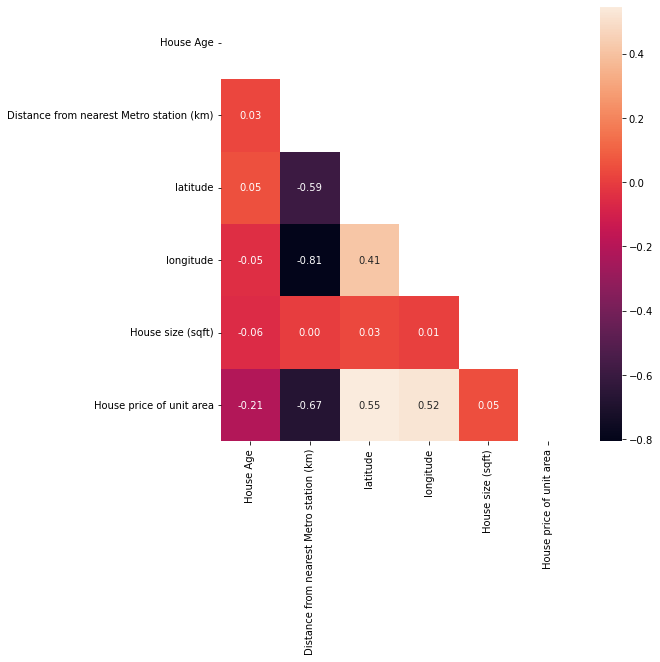

In [408]:
corr = feature_list_corr.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(8,8))
sns.heatmap(feature_list_corr.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [409]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    return lower_limit, upper_limit

In [410]:
feature_list=df[[
       'Distance from nearest Metro station (km)',
       'latitude', 'longitude',
      'House price of unit area']].columns

In [411]:
for i in feature_list:
    LL,UL=remove_outlier(df[i])
    df[i]=np.where(df[i]<LL,LL,df[i])
    df[i]=np.where(df[i]>UL,UL,df[i])

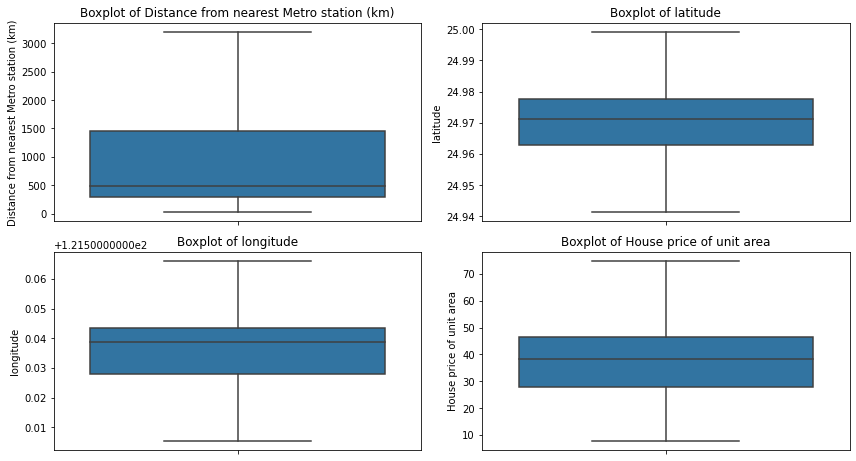

In [412]:
plt.figure(figsize=(12,16))
for i in range(len(feature_list)):
    plt.subplot(5,2,i+1)
    sns.boxplot(y=df[feature_list[i]],data=df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [413]:
df.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [414]:
# Renaming Column Name
df.rename(columns = {'House Age':'House_Age', 'Distance from nearest Metro station (km)':'Distance_from_nearest_Metro_station',
                              'Number of convenience stores':'Number_of_convenience_stores','Number of bedrooms':'Number_of_bedrooms','House size (sqft)':'House_size','House price of unit area':'House_price_of_unit_area'}, inplace = True)

In [415]:
df.head()

,House_Age,Distance_from_nearest_Metro_station,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size,House_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [416]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import metrics

In [417]:
X_1=df.drop('House_price_of_unit_area',axis=1)
y_1=df[['House_price_of_unit_area']]

In [418]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1, y_1, test_size=0.30 , random_state=1)

In [419]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (289, 7)
X_test (125, 7)
Y_train (289, 1)
Y_test (125, 1)


In [420]:
regression_model_1 = LinearRegression()
regression_model_1.fit(X_train, Y_train)

LinearRegression()

In [421]:
intercept1 = regression_model_1.intercept_[0]
print("The intercept for our model is {}".format(intercept1))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_1.coef_[0][idx]))

The intercept for our model is -5277.181481260923
The coefficient for House_Age is -0.25245919920020327
The coefficient for Distance_from_nearest_Metro_station is -0.006258395337943501
The coefficient for Number_of_convenience_stores is 0.9201665828946162
The coefficient for latitude is 241.00795476786396
The coefficient for longitude is -5.725842054574471
The coefficient for Number_of_bedrooms is 2.165750016352232
The coefficient for House_size is -0.004674419443318952


In [422]:
intercept = regression_model_1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5277.181481260923


In [423]:
# R square on training data
Rsq1_train=regression_model_1.score(X_train, Y_train)
Rsq1_train

0.63688998613255

In [424]:
# R square on testing data
Rsq1_test=regression_model_1.score(X_test, Y_test)
Rsq1_test

0.6232303083355903

In [425]:
#RMSE on Training data
predicted_train=regression_model_1.fit(X_train, Y_train).predict(X_train)
RMSE1_train=np.sqrt(metrics.mean_squared_error(Y_train,predicted_train))
RMSE1_train

7.716967158524519

In [426]:
#RMSE on Testing data
predicted_test=regression_model_1.fit(X_train, Y_train).predict(X_test)
RMSE1_test=np.sqrt(metrics.mean_squared_error(Y_test,predicted_test))

In [427]:
# Prediction on Test data
y_pred = regression_model_1.predict(X_test)

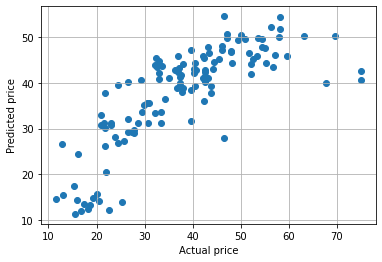

In [428]:
plt.scatter(Y_test['House_price_of_unit_area'], y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.grid()
plt.show()

In [429]:
data_train_1 = pd.concat([X_train, Y_train], axis=1)
data_test_1 = pd.concat([X_test, Y_test], axis=1)

In [430]:
data_train_1.columns

Index(['House_Age', 'Distance_from_nearest_Metro_station',
       'Number_of_convenience_stores', 'latitude', 'longitude',
       'Number_of_bedrooms', 'House_size', 'House_price_of_unit_area'],
      dtype='object')

In [431]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'House_price_of_unit_area ~ House_Age+Distance_from_nearest_Metro_station+Number_of_convenience_stores+latitude+longitude+Number_of_bedrooms+House_size', data = data_train_1).fit()
lm1.params

Intercept                             -5277.181481
House_Age                                -0.252459
Distance_from_nearest_Metro_station      -0.006258
Number_of_convenience_stores              0.920167
latitude                                241.007955
longitude                                -5.725842
Number_of_bedrooms                        2.165750
House_size                               -0.004674
dtype: float64

In [432]:
print(lm1.summary())

                               OLS Regression Results                               
Dep. Variable:     House_price_of_unit_area   R-squared:                       0.637
Model:                                  OLS   Adj. R-squared:                  0.628
Method:                       Least Squares   F-statistic:                     70.41
Date:                      Sun, 04 Dec 2022   Prob (F-statistic):           3.64e-58
Time:                              22:45:12   Log-Likelihood:                -1000.6
No. Observations:                       289   AIC:                             2017.
Df Residuals:                           281   BIC:                             2047.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [433]:
# Adjuster R sqr
adj1_rsq=0.628

In [434]:
#MSE Train
Stats_Rsq1_train = np.mean((lm1.predict(data_train_1.drop('House_price_of_unit_area',axis=1))-data_train_1['House_price_of_unit_area'])**2)
Stats_Rsq1_train

59.55158212574506

In [435]:
#MSE Test
Stats_Rsq1_test = np.mean((lm1.predict(data_test_1.drop('House_price_of_unit_area',axis=1))-data_test_1['House_price_of_unit_area'])**2)
Stats_Rsq1_test

71.14658470350632

In [436]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-5277.18) * Intercept + (-0.25) * House_Age + (-0.01) * Distance_from_nearest_Metro_station + (0.92) * Number_of_convenience_stores + (241.01) * latitude + (-5.73) * longitude + (2.17) * Number_of_bedrooms + (-0.0) * House_size + 

In [437]:
index=['Intercept','R.Sq Train ','R.Sq Test','RMSE Train','RMSE Test']
data=pd.DataFrame({'Model 1':[intercept1,Rsq1_train,Rsq1_test,RMSE1_train,RMSE1_test]},index=index)
    
round(data,2)

,Model 1
Intercept,-5277.18
R.Sq Train,0.64
R.Sq Test,0.62
RMSE Train,7.72
RMSE Test,8.43


In [438]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [439]:
vif_1= [variance_inflation_factor(X_1.values, ix) for ix in range(X_1.shape[1])] 

In [440]:
i=0
for column in X_1.columns:
    if i < 10:
        print (column ,"--->",  vif_1[i])
        i = i+1

House_Age ---> 3.4764233272707776
Distance_from_nearest_Metro_station ---> 3.7725452114984357
Number_of_convenience_stores ---> 5.115955610557576
latitude ---> 6269647.447008106
longitude ---> 6269705.948553848
Number_of_bedrooms ---> 16.01495444862451
House_size ---> 18.93870468330117


#### Model 2 Laso and Ridge

In [441]:
df.head()

,House_Age,Distance_from_nearest_Metro_station,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size,House_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [442]:
X_2=df.drop({ 'latitude','longitude','Number_of_bedrooms','House_size','House_price_of_unit_area'}, axis=1)
y_2=df[['House_price_of_unit_area']]

In [443]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, y_2, test_size=0.30 , random_state=1)

In [444]:
regression_model_2 = LinearRegression()
regression_model_2.fit(X_train_2, Y_train_2)

LinearRegression()

In [445]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [446]:
# Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.3)
ridge.fit(X_train_2,Y_train_2)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-0.22965458 -0.00773469  1.03915312]]


In [447]:
# Create a regularized LASSO model and note the coefficients
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_2,Y_train_2)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-0.22895586 -0.00777804  1.0184555 ]


#### Let us compare their scores

In [448]:
# R.sq for regression_model_2
regression_model_2_train= regression_model_2.score(X_train_2, Y_train_2)
regression_model_2_train

0.5923728734241902

In [449]:
regression_model_2_test= regression_model_2.score(X_test_2, Y_test_2)
regression_model_2_test

0.6350525738228955

In [450]:
# R.sq for ridge_model_2
regression_ridge_2_train=ridge.score(X_train_2, Y_train_2)
regression_ridge_2_train

0.5923728719357841

In [451]:
regression_ridge_2_test=ridge.score(X_test_2, Y_test_2)
regression_ridge_2_test

0.6350509044716677

In [452]:
# R.sq for lasso_model_2
regression_lasso_2_train=lasso.score(X_train_2, Y_train_2)
regression_lasso_2_train

0.592359682235363

In [453]:
regression_lasso_2_test=lasso.score(X_test_2, Y_test_2)
regression_lasso_2_test

0.6347933302269089

In [454]:
intercept_2_regression = regression_model_2.intercept_[0]
print("The intercept for our model is {}".format(intercept2))
for idx, col_name in enumerate(X_train_2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_2.coef_[0][idx]))

The intercept for our model is 45.13681784564828
The coefficient for House_Age is -0.22965580678642025
The coefficient for Distance_from_nearest_Metro_station is -0.007734221979948951
The coefficient for Number_of_convenience_stores is 1.0393791462820763


In [455]:
intercept_2_ridge = ridge.intercept_[0]
print("The intercept for our model is {}".format(intercept_2_ridge))
for idx, col_name in enumerate(X_train_2.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))

The intercept for our model is 45.13681784564828
The coefficient for House_Age is -0.22965457691536667
The coefficient for Distance_from_nearest_Metro_station is -0.007734694299160217
The coefficient for Number_of_convenience_stores is 1.03915312029989


In [456]:
intercept_2_lasso = lasso.intercept_[0]
print("The intercept for our model is {}".format(intercept_2_lasso))
print ('The coefficient for House_Age is -0.22895586')
print ('The coefficient for Distance_from_nearest_Metro_station is -0.00777804')
print ('The coefficient for Number_of_convenience_stores is  1.0184555')


The intercept for our model is 45.2523763503691
The coefficient for House_Age is -0.22895586
The coefficient for Distance_from_nearest_Metro_station is -0.00777804
The coefficient for Number_of_convenience_stores is  1.0184555


In [457]:
#RMSE regression on Training data
predicted_train_2_regression=regression_model_2.fit(X_train_2, Y_train_2).predict(X_train_2)
RMSE2_train_2_regression=np.sqrt(metrics.mean_squared_error(Y_train_2,predicted_train_2_regression))
RMSE2_train_2_regression

8.17634254388641

In [458]:
#RMSE regression on Testing data
predicted_test_2_regression=regression_model_2.fit(X_train_2, Y_train_2).predict(X_test_2)
RMSE2_test_2_regression=np.sqrt(metrics.mean_squared_error(Y_test_2,predicted_test_2_regression))
RMSE2_test_2_regression

8.301454679333268

In [459]:
#RMSE ridge on Training data
predicted_train_2_ridge=ridge.fit(X_train_2, Y_train_2).predict(X_train_2)
RMSE2_train_2_ridge=np.sqrt(metrics.mean_squared_error(Y_train_2,predicted_train_2_ridge))
RMSE2_train_2_ridge

8.176342558813921

In [460]:
#RMSE ridge on testing data
predicted_test_2_ridge=ridge.fit(X_train_2, Y_train_2).predict(X_test_2)
RMSE2_test_2_ridge=np.sqrt(metrics.mean_squared_error(Y_test_2,predicted_test_2_ridge))
RMSE2_test_2_ridge

8.301473665667627

In [461]:
#RMSE lasso on Training data
predicted_train_2_lasso=lasso.fit(X_train_2, Y_train_2).predict(X_train_2)
RMSE2_train_2_lasso=np.sqrt(metrics.mean_squared_error(Y_train_2,predicted_train_2_lasso))
RMSE2_train_2_lasso

8.176474839799535

In [462]:
#RMSE lasso on testing data
predicted_test_2_lasso=lasso.fit(X_train_2, Y_train_2).predict(X_test_2)
RMSE2_test_2_lasso=np.sqrt(metrics.mean_squared_error(Y_test_2,predicted_test_2_lasso))
RMSE2_test_2_lasso

8.304402661362673

In [463]:
index_2=['Intercept','R.Sq Train','R.Sq Test','RMSE Train','RMSE Test']
data_2=pd.DataFrame({'Model 2':[intercept_2_regression,regression_model_2_train,regression_model_2_test,RMSE2_train_2_regression,RMSE2_test_2_regression],
                   'Model 3':[intercept_2_ridge,regression_ridge_2_train,regression_ridge_2_test,RMSE2_train_2_ridge,RMSE2_test_2_ridge],
                   'Model 4':[intercept_3_lasso,regression_lasso_2_train,regression_lasso_2_test,RMSE2_train_2_lasso,RMSE2_test_2_lasso]},index=index_2)
round(data_2,2)

,Model 2,Model 3,Model 4
Intercept,45.14,45.14,45.25
R.Sq Train,0.59,0.59,0.59
R.Sq Test,0.64,0.64,0.63
RMSE Train,8.18,8.18,8.18
RMSE Test,8.30,8.30,8.30


In [464]:
#More or less all three models give similar results but with fewer complex models.  Complexity is a function of variables and coefficients
#As a result, we can say that compared to Model 1, Models 2,3 & 4 predicted well in terms of R.sq.

#### Model 3

In [465]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [466]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train_2)
X_test_scaled=ss.transform(X_test_2)

In [467]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)


models=[dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,Y_train)
        scores_train.append(i.score(X_train, Y_train))
        scores_test.append(i.score(X_test, Y_test))
        rmse_train.append(np.sqrt(mean_squared_error(Y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(Y_test,i.predict(X_test))))
 
    else :
        i.fit(X_train_scaled,Y_train)
        scores_train.append(i.score(X_train_scaled, Y_train))
        scores_test.append(i.score(X_test_scaled, Y_test))
        rmse_train.append(np.sqrt(mean_squared_error(Y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(Y_test,i.predict(X_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'R.Sq_train':scores_train,'R.Sq_test': scores_test},
            index=['Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  R.Sq_train  R.Sq_test
Decision Tree Regressor    0.000000   9.984280    1.000000   0.472095
Random Forest Regressor    2.592766   7.068913    0.959011   0.735377
ANN Regressor              7.247218   7.767452    0.679751   0.680494


Text(0.5, 0, 'Random Forest Feature Importance')

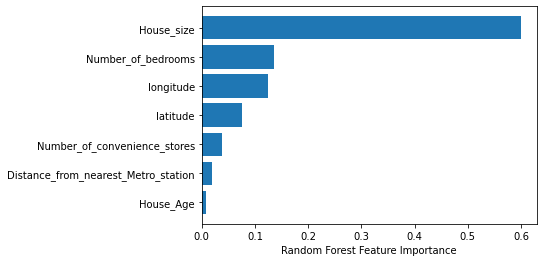

In [468]:
sorted_idx1 = rfr.feature_importances_.argsort()
plt.barh(X_train.columns,rfr.feature_importances_[sorted_idx1])
plt.xlabel("Random Forest Feature Importance")

In [469]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)


models=[dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(X_train,Y_train)
        scores_train.append(i.score(X_train, Y_train))
        scores_test.append(i.score(X_test, Y_test))
        rmse_train.append(np.sqrt(mean_squared_error(Y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(Y_test,i.predict(X_test))))
        
    else :
        i.fit(X_train_scaled,Y_train)
        scores_train.append(i.score(X_train_scaled, Y_train))
        scores_test.append(i.score(X_test_scaled, Y_test))
        rmse_train.append(np.sqrt(mean_squared_error(Y_train,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(Y_test,i.predict(X_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Decision Tree Regressor    6.292982   7.201592        0.758533    0.725350
Random Forest Regressor    5.654434   6.879425        0.805050    0.749374
ANN Regressor              7.477800   7.689213        0.659049    0.686898


Text(0.5, 0, 'Random Forest Feature Importance')

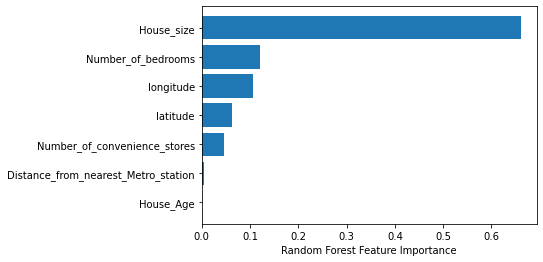

In [470]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(X_train.columns,rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [472]:
index_3=['Intercept','R.Sq Train','R.Sq Test','RMSE Train','RMSE Test']
data_3=pd.DataFrame({'Model 1':[intercept1,Rsq1_train,Rsq1_test,RMSE1_train,RMSE1_test],
'Model 2':[intercept_2_regression,regression_model_2_train,regression_model_2_test,RMSE2_train_2_regression,RMSE2_test_2_regression],
                   'Model 3':[intercept_2_ridge,regression_ridge_2_train,regression_ridge_2_test,RMSE2_train_2_ridge,RMSE2_test_2_ridge],
                   'Model 4':[intercept_3_lasso,regression_lasso_2_train,regression_lasso_2_test,RMSE2_train_2_lasso,RMSE2_test_2_lasso]},index=index_3)
round(data_3,2)


,Model 1,Model 2,Model 3,Model 4
Intercept,-5277.18,45.14,45.14,45.25
R.Sq Train,0.64,0.59,0.59,0.59
R.Sq Test,0.62,0.64,0.64,0.63
RMSE Train,7.72,8.18,8.18,8.18
RMSE Test,8.43,8.30,8.30,8.30


Key Inferences: 

▪ Modelsel 1, 2, 3, and 4 give more or less the same R.Square and it slightly predicted poor in both 
training and test and leads to underfitting 

▪ Model default parameter Decision Tree Regressor, Random Forest Regressor predicted well in train 
data but poor in test data in terms of RMSE & R.Square and this leads to overfitting and Model Ann 
Regressor predicted poor in both train and test data in terms of RMSE & R.Square leads to underfitting 
12

▪ Model Tunned Parameter Ann Regressor & Decision Tree Regressor gives more or less the same in 
terms of RMSE & R.Square and it slightly predicted poor in both training and test and leads to 
underfitting

▪ Model Tunned Random Forest regressor gives seems to predict high R.sq. This model seems quite 
stable. Can’t see a big difference in train and test results as compared to the model


Here we conclude that our model doesn’t perform more effectively, this is due to high multicollinearity 
between independent variables and useless variables, and as per the size of the rows, most of the 
features seem to be useless, due to the lack of feature model didn’t perform great extend to predict the 
price. Still, we violated some of the linear model assumptions and created 10 models. As per the 
comparison of 10 models, we chose Tunned Random Forest model, moderately to be our best fit model 
since this model gives the best RMSE score & R.sq value.


Compared to 10 models, the model Tunned Random Forest regressor gives a reasonable RMSE & R.sq value


The top 5 most important features are:
[‘House_size’, 'Number_of_bedrooms’, 'longitude', 'latitude', 'Number_of_convenience_stores'